# Capstone Project on Apple App Rating

## Problem Summary:
With million of apps around nowadays, mobile app analytics is a great way to understand the existing strategy to drive growth and retention of future user. This data set contains more than 7000 Apple iOS mobile application details, e.g. size, price, genre, rating_count, description and etc. The data was extracted from the iTunes Search API at the Apple Inc website. The goal is to predict whether the overall rating for the app is more than 4 stars (1=yes, 0=no), which we think it a very good app

## Exploratory Data Analysis
* Build data profile tables and plots
* Outliers & Anomalies
* Explore data relationships
* Identification and creation of features

Load packages needed for EDA

In [1]:
#load python packages
import os
import pandas as pd
import datetime 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline

currentdirectory = os.getcwd()
print(currentdirectory)


/Users/oluwafemibabatunde


In [2]:
path = '/Users/oluwafemibabatunde/Desktop/Springboard/capstone_one/apple-app/data'

In [3]:
os.chdir(path) #Change current directory

In [4]:
df = pd.read_csv('step1_output.csv', index_col = 0) #load csv file from folder

In [5]:
df.head(3) #load top 3 rows of dataframe

,id,size_bytes,price,rating_count_tot,rating_count_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,rating,Vector_track_name,Vector_desc
0,1169417102,196380672,4.99,1,1,1.02,4+,Games,38,5,1,1,0,[0. 0. 0. ... 0. 0. 0.],[0. 0. 0. ... 0. 0. 0.]
1,965748314,38805504,0.00,199,199,1.0.0,9+,Games,43,3,16,0,0,[0. 0. 0. ... 0. 0. 0.],[0. 0. 0. ... 0. 0. 0.]
2,307764057,25808896,0.00,182,0,6.52,17+,Entertainment,37,5,3,1,0,[0. 0. 0. ... 0. 0. 0.],[0. 0. 0. ... 0. 0. 0.]


In [6]:
df.shape #shape of the dataframe

(5197, 15)

In [7]:
df.dtypes

id                     int64
size_bytes             int64
price                float64
rating_count_tot       int64
rating_count_ver       int64
ver                   object
cont_rating           object
prime_genre           object
sup_devices.num        int64
ipadSc_urls.num        int64
lang.num               int64
vpp_lic                int64
rating                 int64
Vector_track_name     object
Vector_desc           object
dtype: object

In [8]:
df.cont_rating.unique()

array(['4+', '9+', '17+', '12+'], dtype=object)

In [9]:
nosymb = df['cont_rating'].str.replace('+', '')

In [10]:
df['cont_rating'] = pd.to_numeric(nosymb)

In [11]:
df.describe().T #this give the summary statistics of variables in data fram that is type float or int.

,count,mean,std,min,25%,50%,75%,max
id,5197.0,8.645881e+08,2.713919e+08,281656475.0,599852923.0,981819100.0,1.082678e+09,1.187839e+09
size_bytes,5197.0,1.970589e+08,3.417424e+08,618496.0,47585280.0,98246656.0,1.853706e+08,4.025970e+09
price,5197.0,1.741312e+00,6.534191e+00,0.0,0.0,0.0,1.990000e+00,2.999900e+02
rating_count_tot,5197.0,1.288472e+04,7.080212e+04,0.0,27.0,307.0,2.908000e+03,2.161558e+06
rating_count_ver,5197.0,4.636350e+02,4.039022e+03,0.0,1.0,24.0,1.450000e+02,1.770500e+05
cont_rating,5197.0,7.055994e+00,4.302163e+00,4.0,4.0,4.0,9.000000e+00,1.700000e+01
sup_devices.num,5197.0,3.742236e+01,3.626466e+00,9.0,37.0,37.0,3.800000e+01,4.700000e+01
ipadSc_urls.num,5197.0,3.719454e+00,1.981193e+00,0.0,3.0,5.0,5.000000e+00,5.000000e+00
lang.num,5197.0,5.405426e+00,7.901467e+00,0.0,1.0,1.0,8.000000e+00,7.500000e+01
vpp_lic,5197.0,9.932653e-01,8.179600e-02,0.0,1.0,1.0,1.000000e+00,1.000000e+00


In [12]:
corr = df.corr() #find possible correlation between variables in datafram
corr.round(2).style.background_gradient(cmap='coolwarm')

,id,size_bytes,price,rating_count_tot,rating_count_ver,cont_rating,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,rating
id,1,0.08,-0.07,-0.21,-0.08,0.02,0.03,0.07,-0.13,0.01,-0.04
size_bytes,0.08,1,0.15,0,0.01,0.14,-0.12,0.17,0.01,-0.16,0.02
price,-0.07,0.15,1,-0.04,-0.02,-0.03,-0.11,0.06,-0.01,-0.02,0
rating_count_tot,-0.21,0,-0.04,1,0.17,0.02,0,0.02,0.12,0,0.11
rating_count_ver,-0.08,0.01,-0.02,0.17,1,0,0.03,0.02,0.02,0.01,0.08
cont_rating,0.02,0.14,-0.03,0.02,0,1,0.02,-0.11,-0.05,-0.05,-0.02
sup_devices.num,0.03,-0.12,-0.11,0,0.03,0.02,1,-0.04,-0.05,-0.04,0.04
ipadSc_urls.num,0.07,0.17,0.06,0.02,0.02,-0.11,-0.04,1,0.1,0.07,0.17
lang.num,-0.13,0.01,-0.01,0.12,0.02,-0.05,-0.05,0.1,1,0.03,0.11
vpp_lic,0.01,-0.16,-0.02,0,0.01,-0.05,-0.04,0.07,0.03,1,0.04


There are no strong correlations between the features in the dataframe as it can be easily seen in the correlation matrix above. This is eaqually captured in the pairplots below

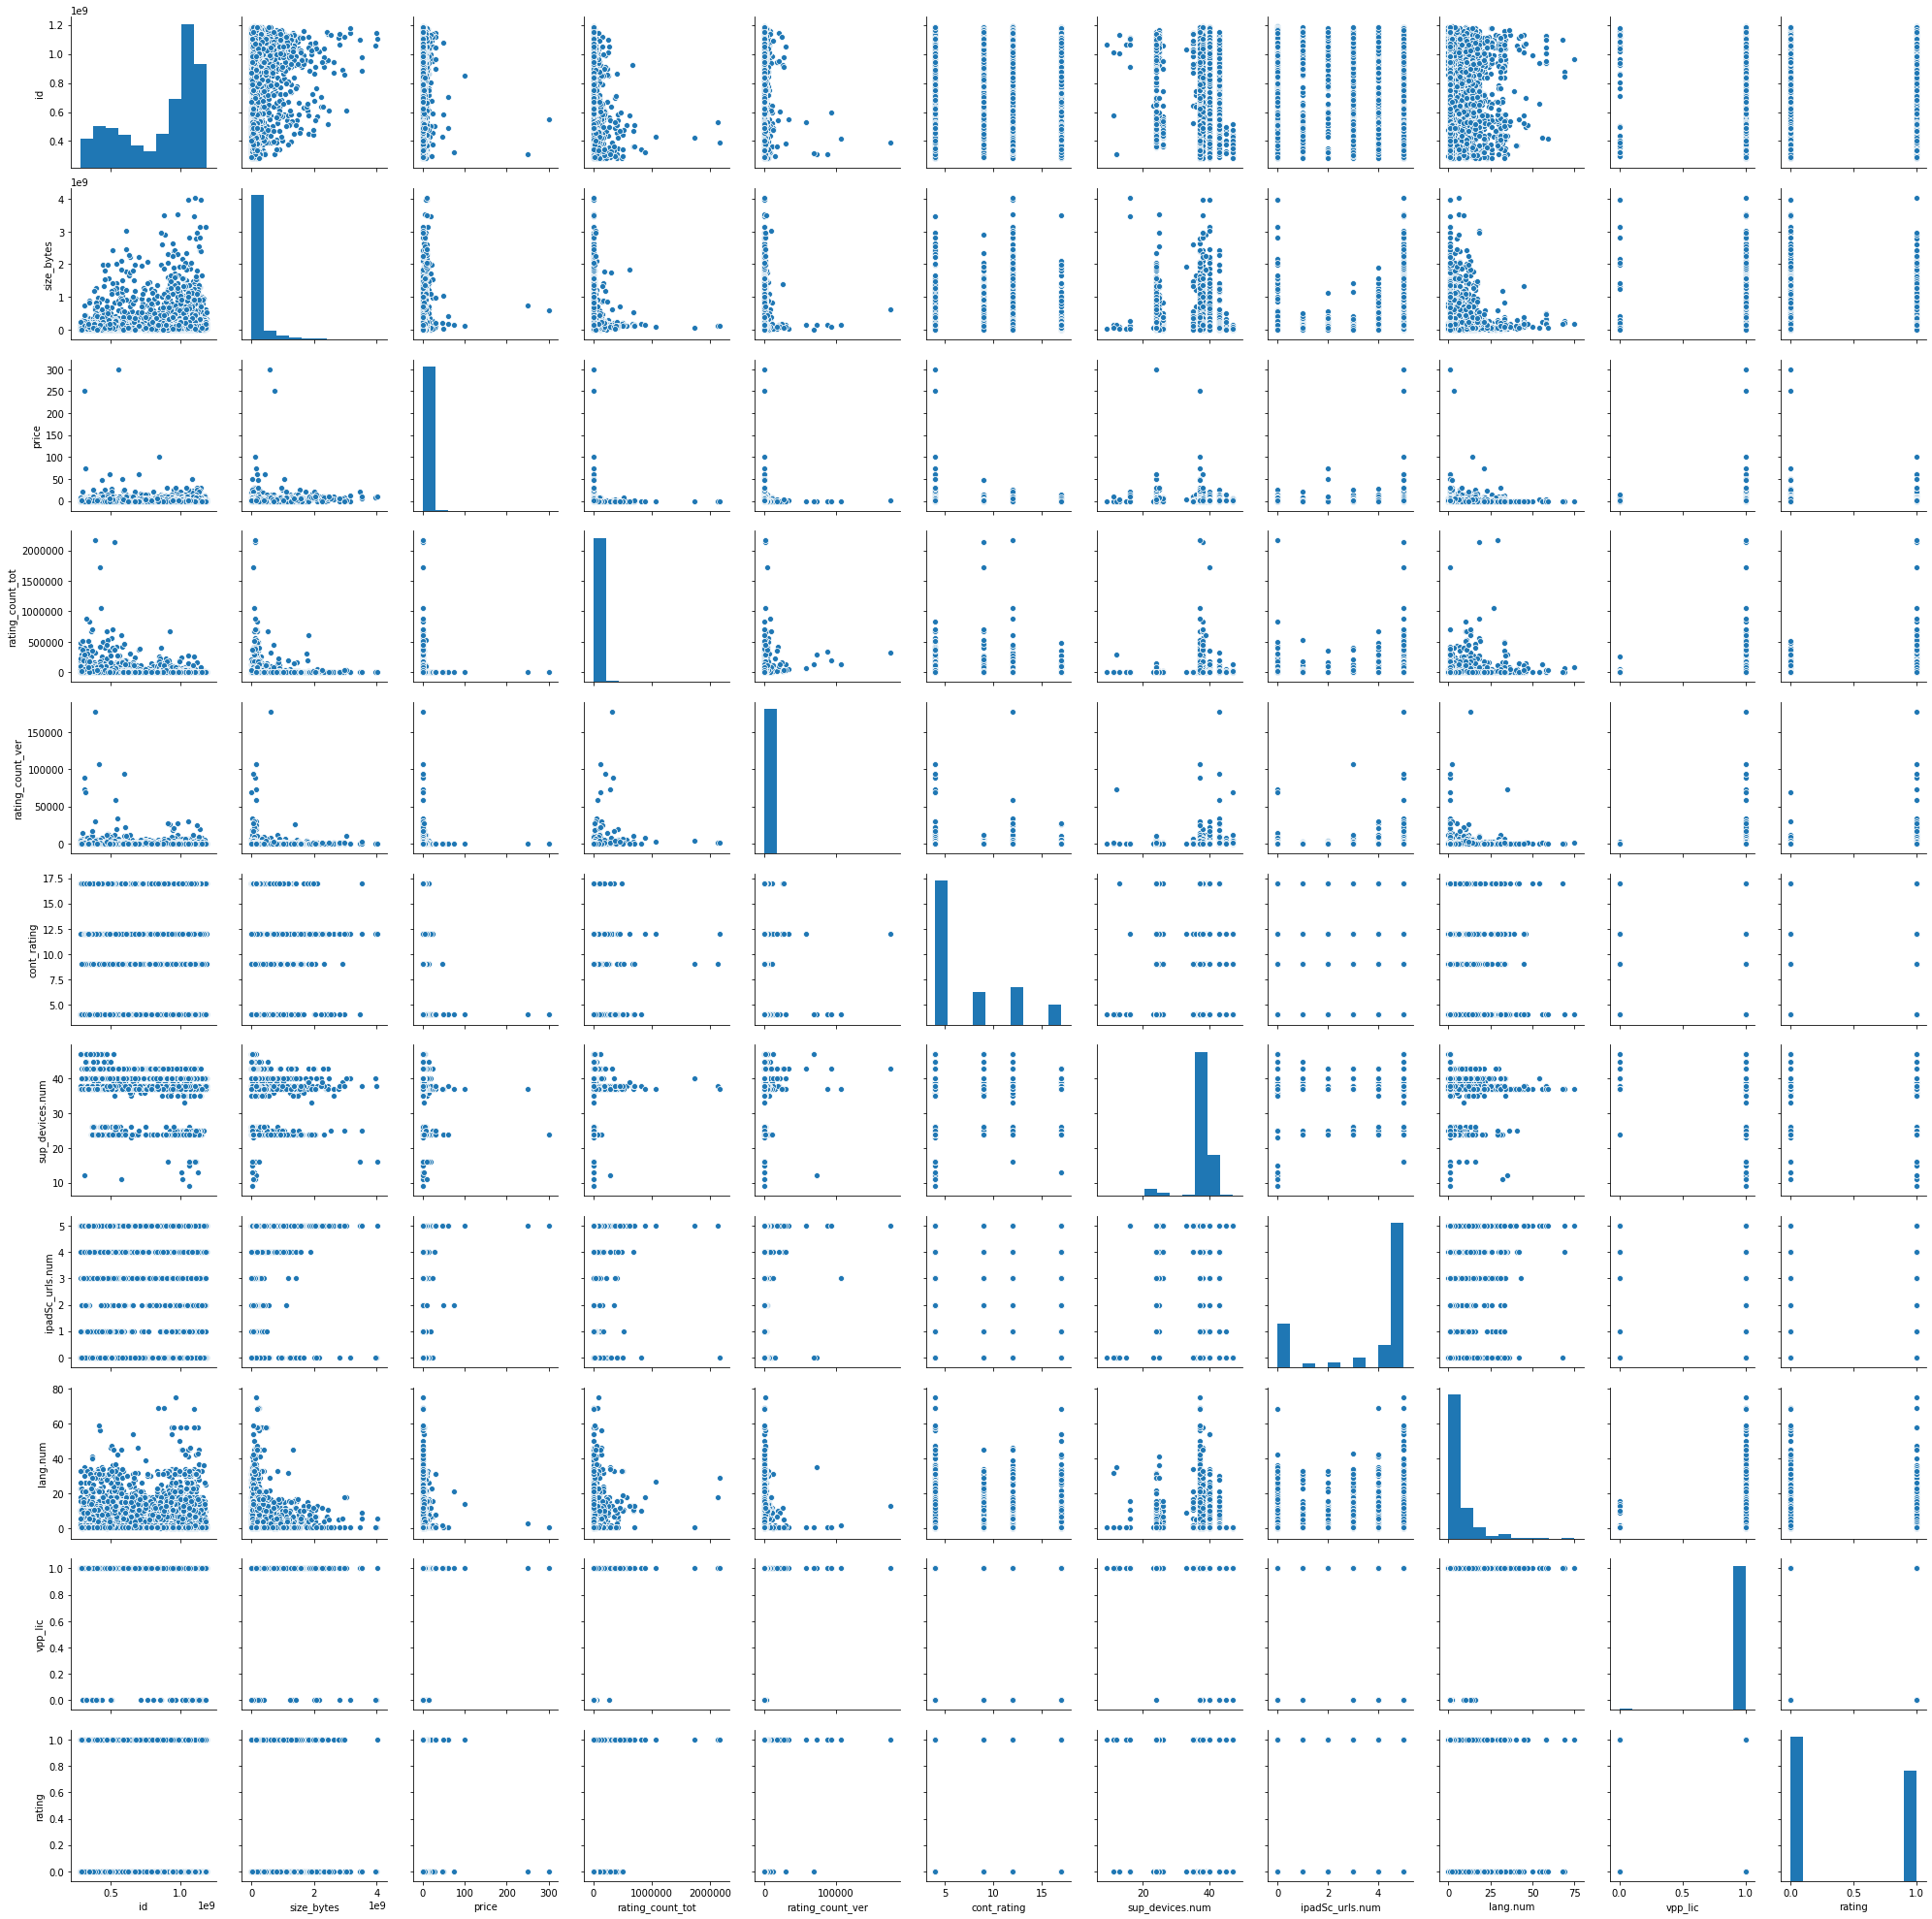

In [13]:
sns.pairplot(df)

In [14]:
df.price.describe()

count    5197.000000
mean        1.741312
std         6.534191
min         0.000000
25%         0.000000
50%         0.000000
75%         1.990000
max       299.990000
Name: price, dtype: float64

It is obvious that more than 50% of the applications' cost 0.0 and the maximum price on one of the applications is $299.99. It will be seen if the price of the applications affect the ratings of the applications

In [15]:
df.prime_genre.unique()

array(['Games', 'Entertainment', 'Finance', 'Education',
       'Health & Fitness', 'Navigation', 'Photo & Video', 'Business',
       'Travel', 'Shopping', 'Lifestyle', 'Food & Drink', 'Music', 'News',
       'Social Networking', 'Productivity', 'Medical', 'Reference',
       'Utilities', 'Weather', 'Sports', 'Book', 'Catalogs'], dtype=object)

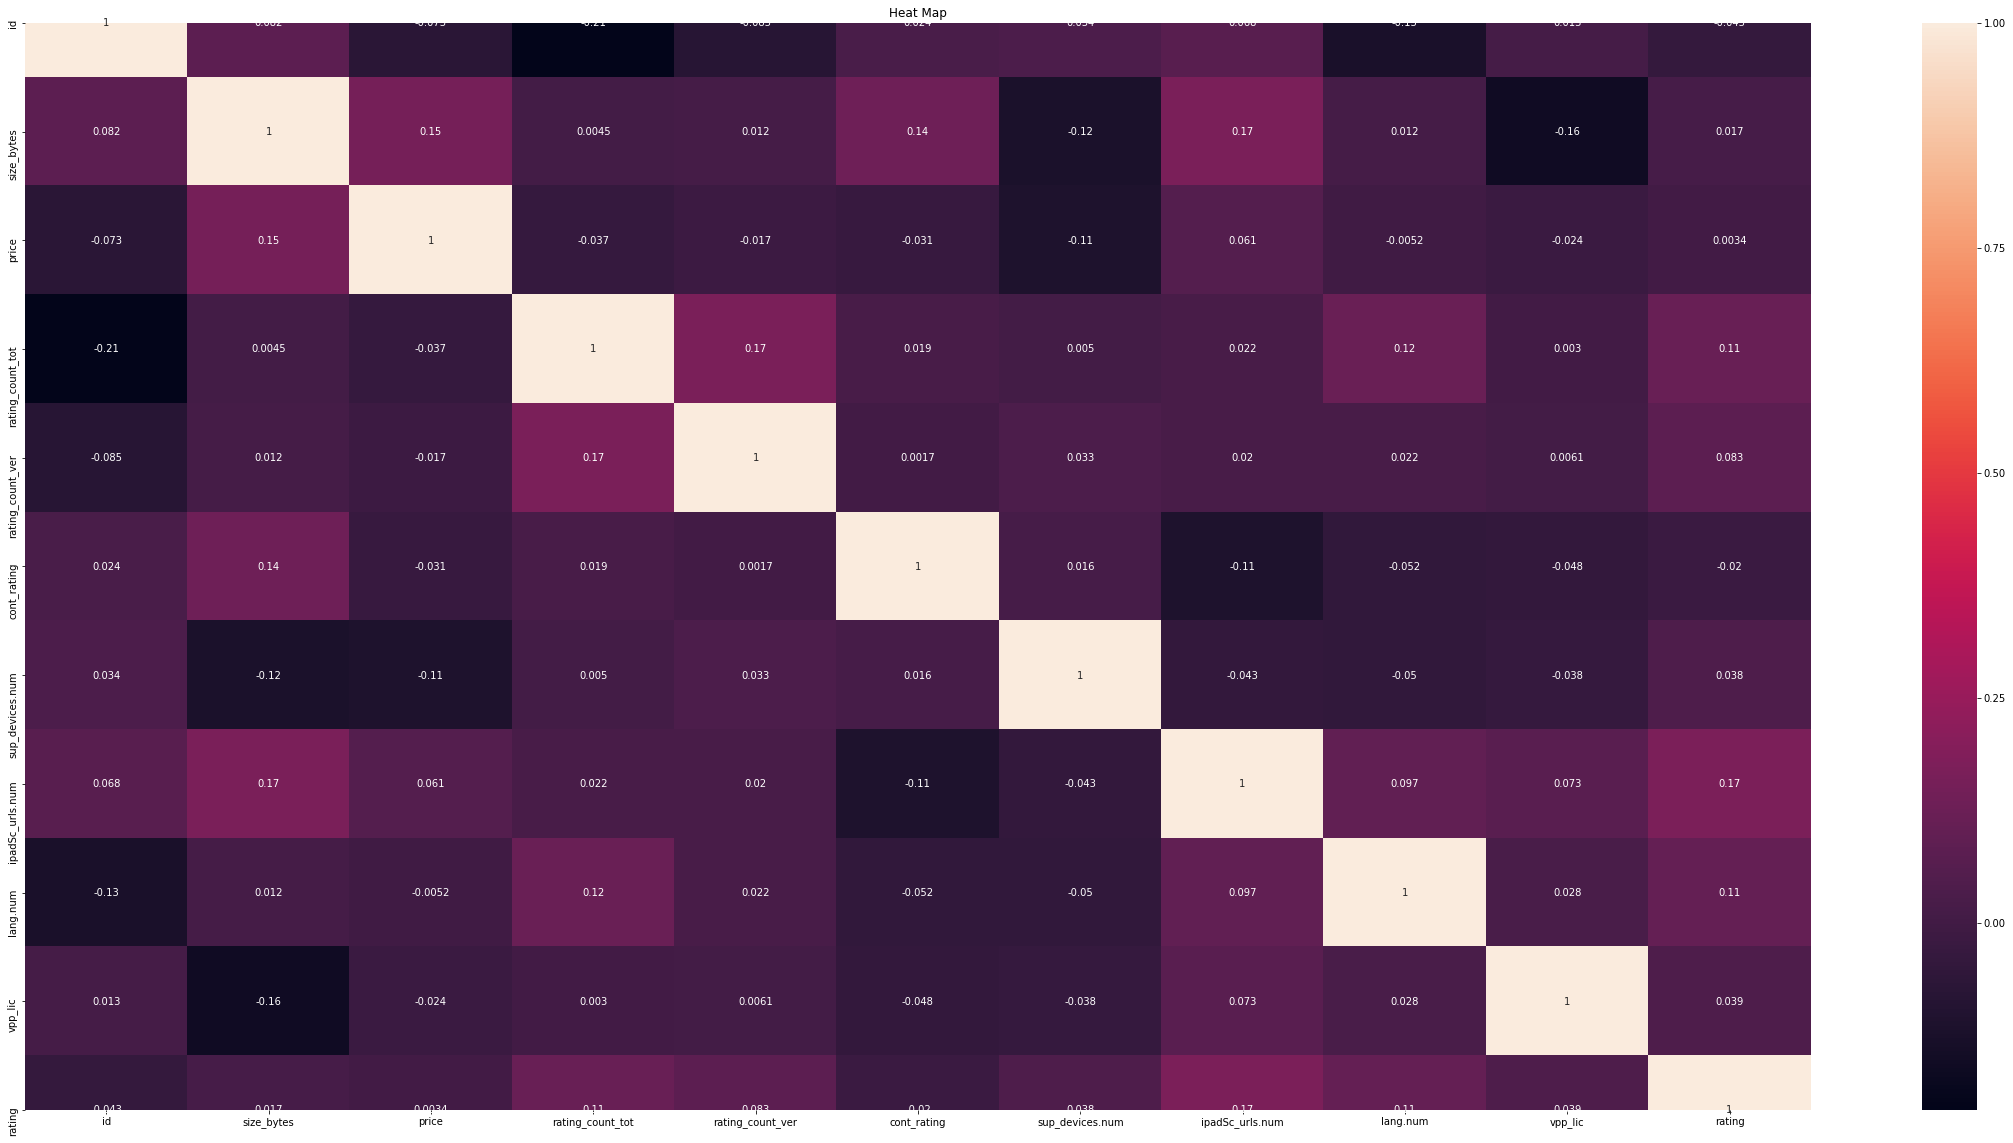

In [16]:
plt.figure(figsize=(40,20))
heatmap = sns.heatmap(df.corr(), annot = True)
plt.title('Heat Map')
plt.savefig('/Users/oluwafemibabatunde/Desktop/Springboard/capstone_one/apple-app/figures/heat_map.png', bbox_inches = 'tight')

The heatmap simply showed the week relationships that exist between the variables in the dataframe

In [17]:
df.columns

Index(['id', 'size_bytes', 'price', 'rating_count_tot', 'rating_count_ver',
       'ver', 'cont_rating', 'prime_genre', 'sup_devices.num',
       'ipadSc_urls.num', 'lang.num', 'vpp_lic', 'rating', 'Vector_track_name',
       'Vector_desc'],
      dtype='object')

In [18]:
column = ['size_bytes', 'price', 'rating_count_tot', 'rating_count_ver',
        'cont_rating', 'sup_devices.num',
       'ipadSc_urls.num', 'lang.num', 'vpp_lic', 'rating']

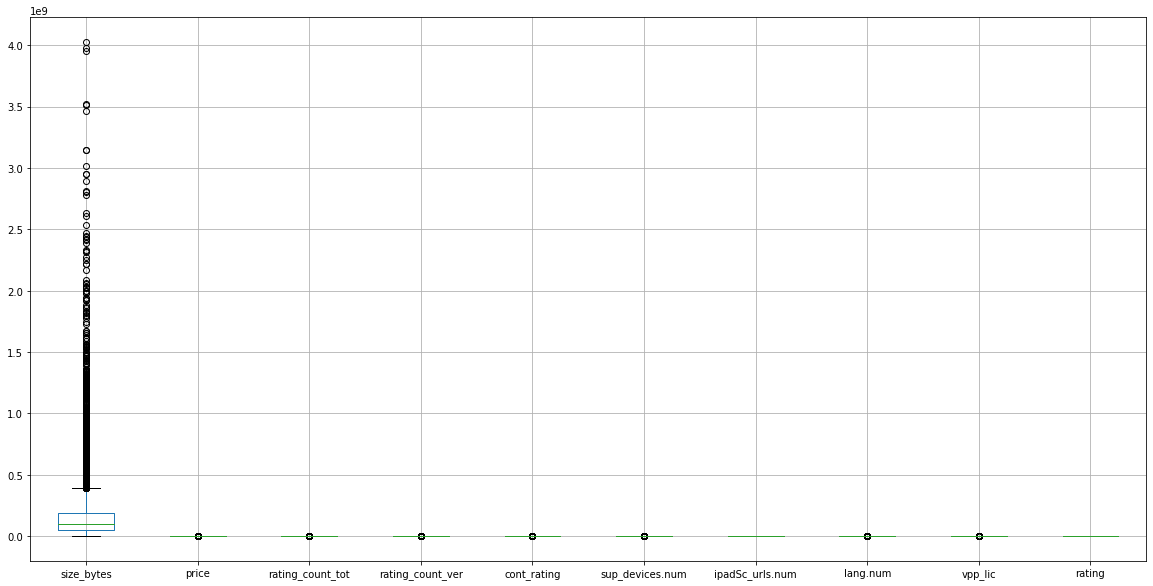

In [19]:
plt.figure(figsize=(20,10))
df.boxplot(column = column)

The boxplot of the features has not done proper justice to view distribution of values in each feature. size_byte feature has bigger values than all other features, hence the distribution can easily be seen. This variable will be dropped and the boxplot will be done again.

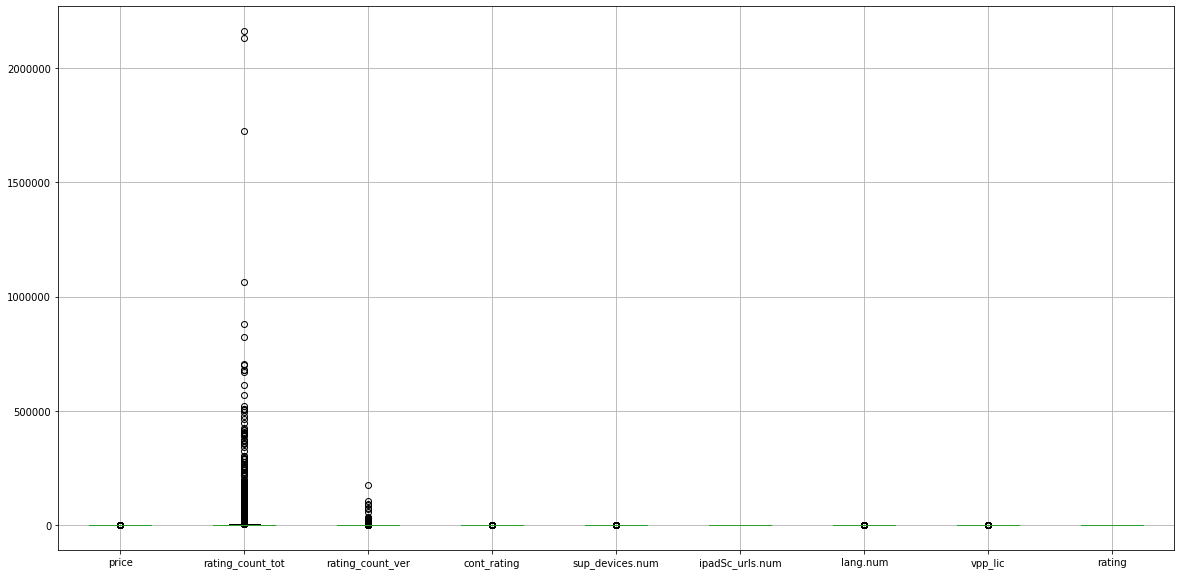

In [20]:
column1 = ['price', 'rating_count_tot', 'rating_count_ver',
        'cont_rating', 'sup_devices.num',
       'ipadSc_urls.num', 'lang.num', 'vpp_lic', 'rating']
plt.figure(figsize=(20,10))
df.boxplot(column = column1)

Rating count also has higher values compared to other features in the dataframe. Other data visualization methods will be considered below to view the relationships betweeen the label and other dependent variables in the dataframe

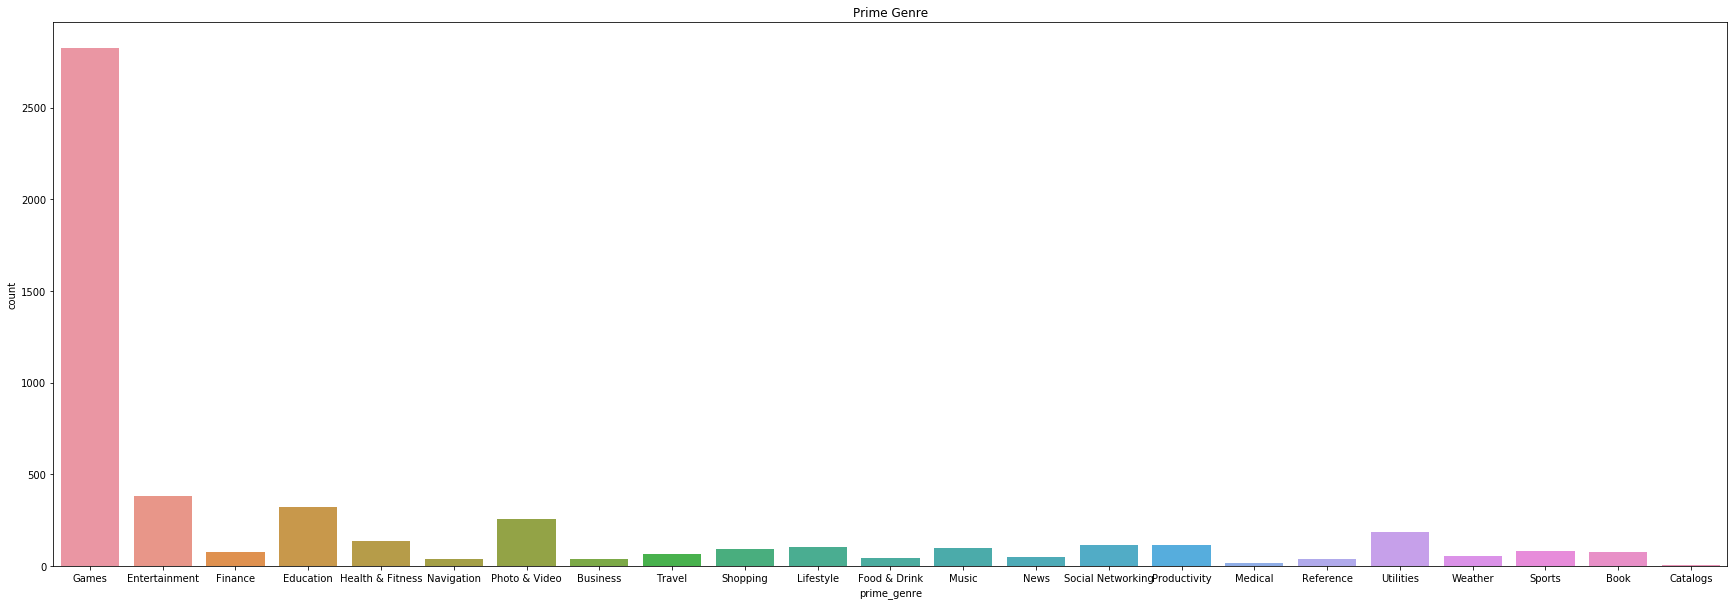

In [21]:
plt.figure(figsize = (30, 10))
games_genre = sns.countplot(data = df, x = 'prime_genre')
plt.title('Prime Genre')
plt.savefig('/Users/oluwafemibabatunde/Desktop/Springboard/capstone_one/apple-app/figures/games_genre.png', bbox_inches = 'tight')

The plot above is a visual distribution of the prime_genre. It is very obvious that games ranked most common out of all the genres in the dataframe, followed by entertainment and education. On average, good number of other genres are below 500 counts and about the same count

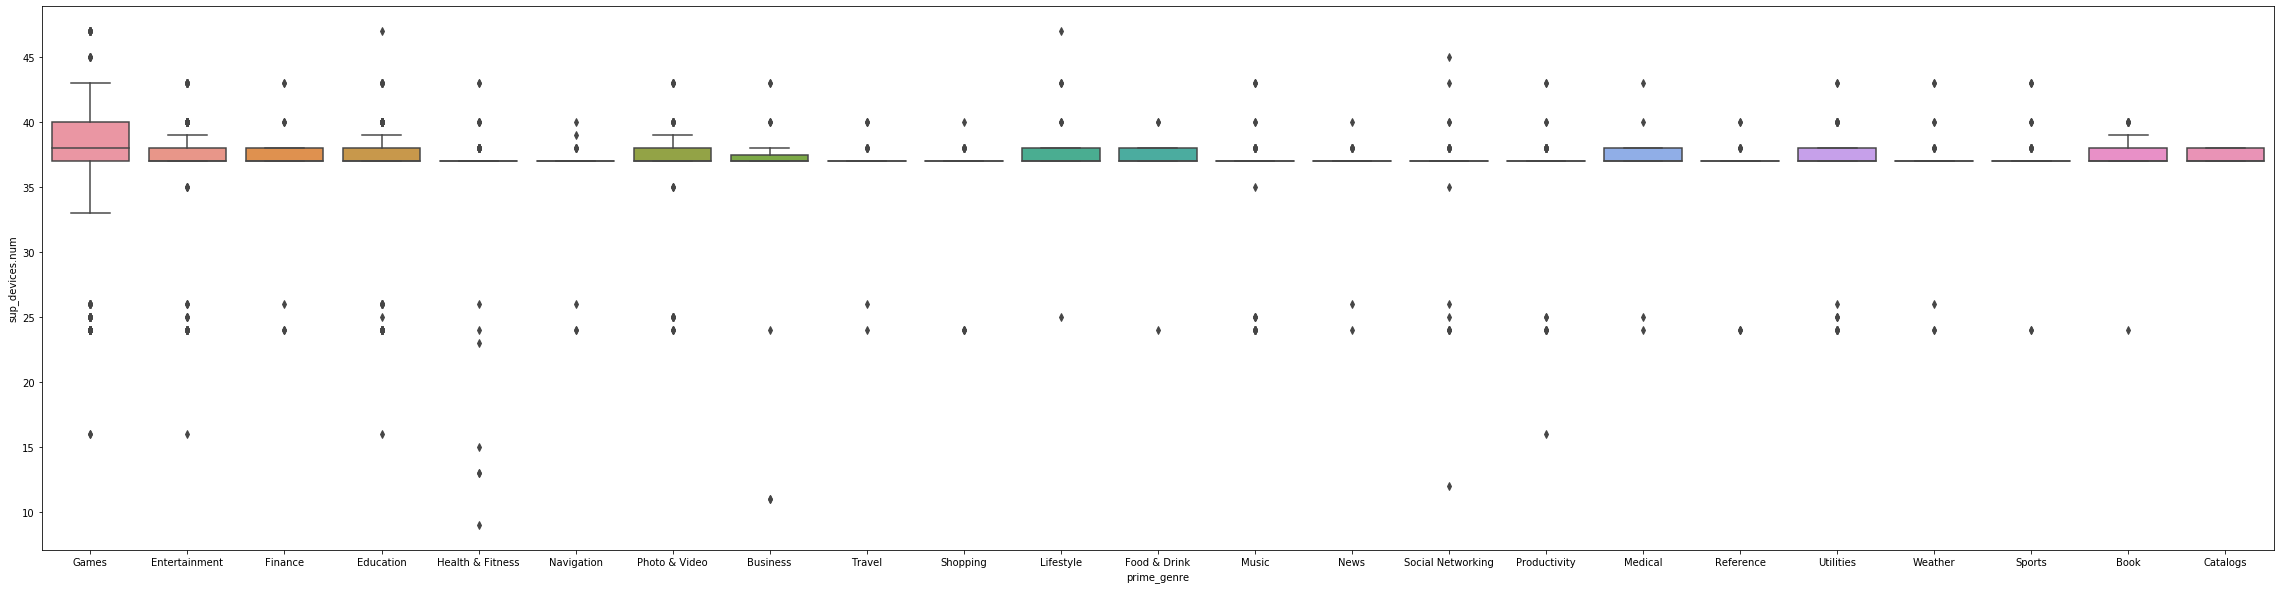

In [22]:
plt.figure(figsize=(40,10))
sns.boxplot(x= 'prime_genre', y = 'sup_devices.num', data = df)

Game has the highest count of prime_genres is with the highest mean of supporting devices. The plot above shows that there are some genres that are not on many devices. A general conclusion is that the average supporting devices for all the genres is 38 devices. 

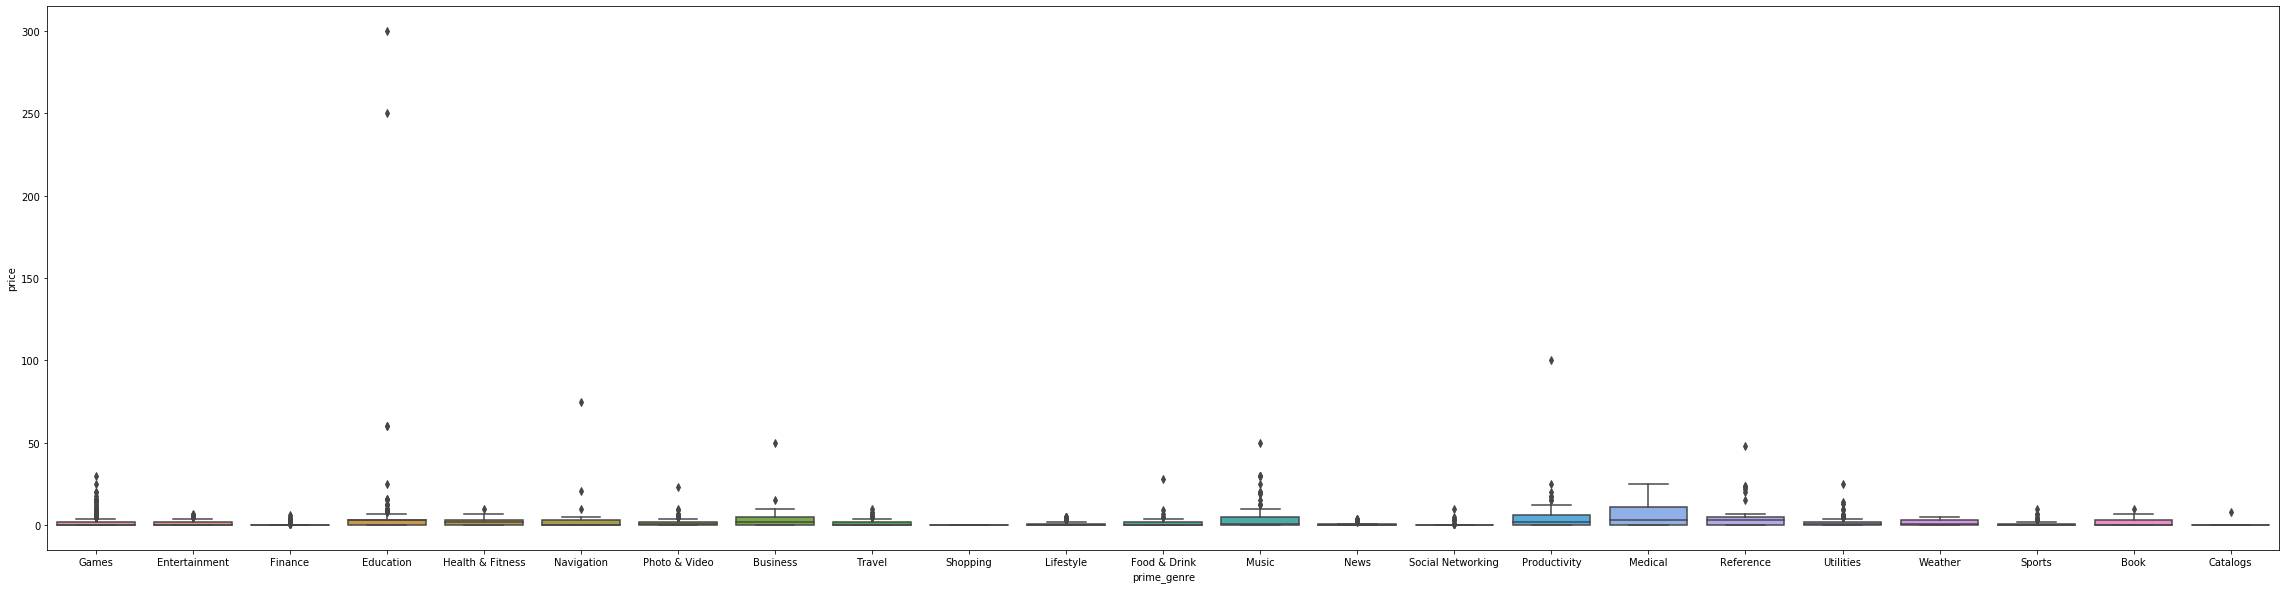

In [23]:
plt.figure(figsize=(40,10))
sns.boxplot(x= 'prime_genre', y = 'price', data = df)

The plot above shows that more that 95% of the applications cost less than 50.00. Obviously, education has the most expensive applications in the dataframe with the higest priced application from education cost 299.99.

In [24]:
df = df.drop(columns = 'ver')

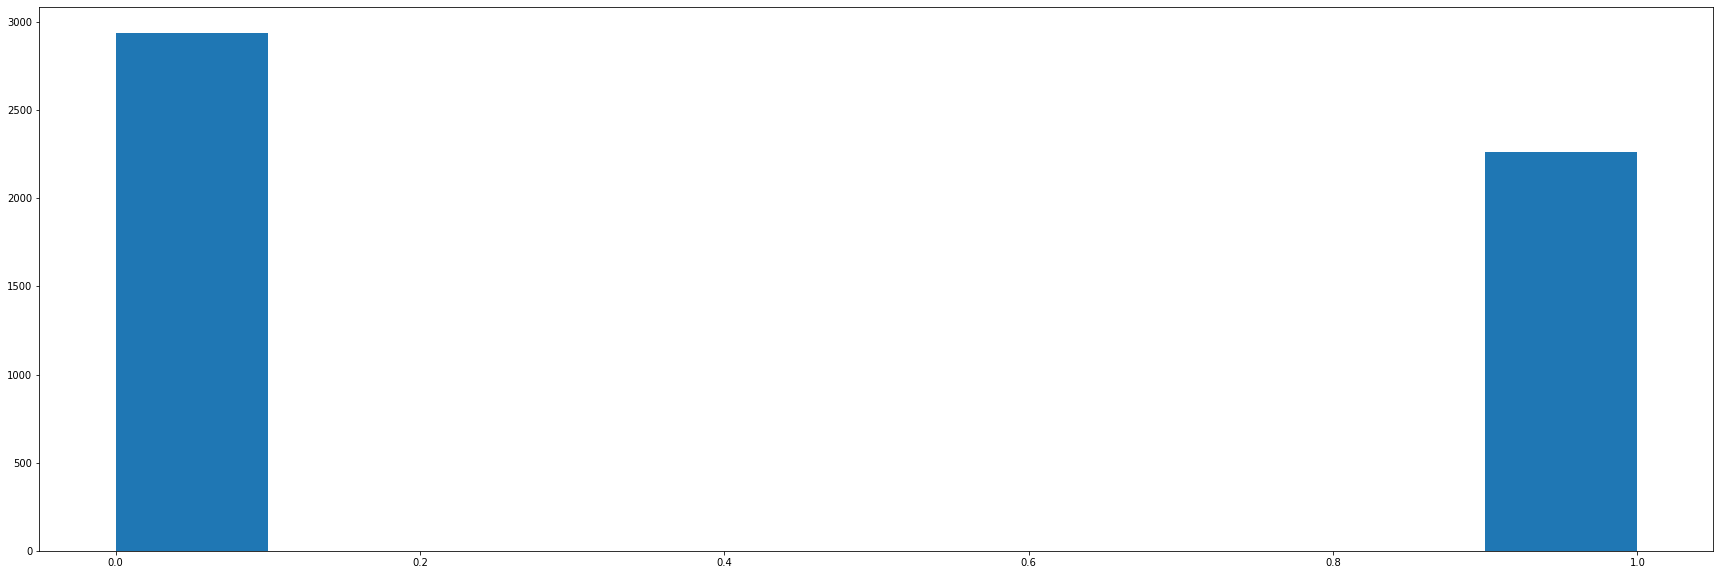

In [25]:
plt.figure(figsize=(30,10))
plt.hist(df.rating);

The plot above shows the binary distribution of ratings of the applications in the database. From visual observation, it can be easily deduced that more of the applications received ratings equal to or less than 4 stars

In [26]:
dfg = df.groupby('prime_genre')['rating'].agg(['mean', 'count']).sort_values(by='mean')
dfg = dfg.reset_index()
dfg.tail()

,prime_genre,mean,count
18,Music,0.489796,98
19,Games,0.498938,2824
20,Photo & Video,0.531250,256
21,Medical,0.562500,16
22,Health & Fitness,0.562963,135


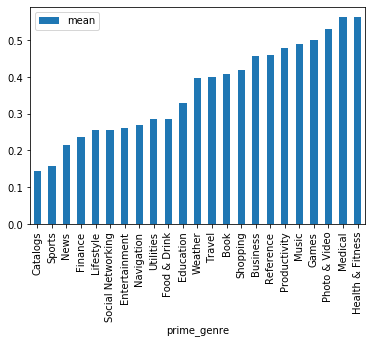

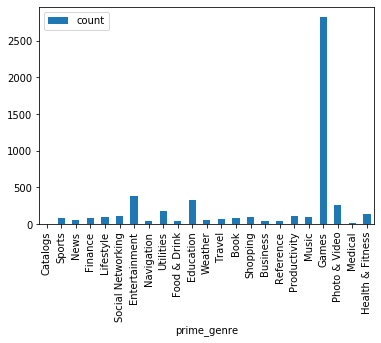

In [27]:
dfg.plot(kind = 'bar', x = 'prime_genre' , y='mean');
dfg.plot(kind = 'bar', x = 'prime_genre' , y='count');

Based on the first plot above, Health & Fitness, Medical, Photo & Video and Games rank amongst genres with total number of ratings greater than 4 . The second plot further shows that of all the application genre present in the dataframe, games apllications are 2824. Using this value, roughly half of the users gave more than 4 stars rating for the application.

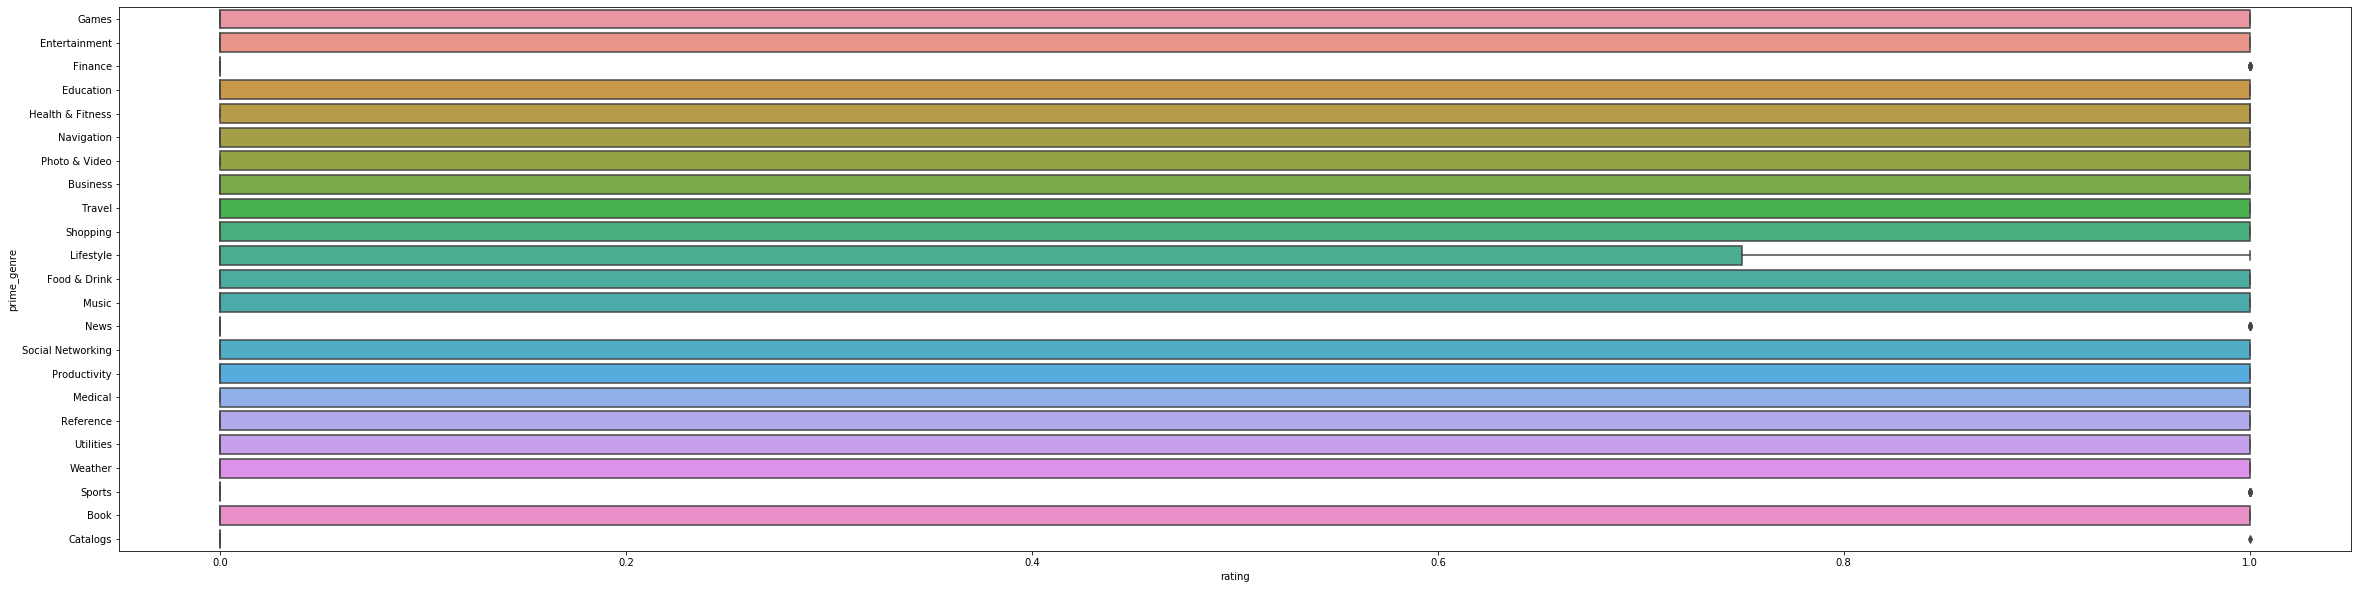

In [28]:
plt.figure(figsize=(40,10))
sns.boxplot(x= 'rating', y = 'prime_genre', data = df)

In [29]:
df_price = df.groupby('rating')['price'].describe()
df_price.head(10)

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
0,2937.0,1.721716,7.891671,0.0,0.0,0.0,1.99,299.99
1,2260.0,1.766779,4.154734,0.0,0.0,0.0,2.99,99.99


In [33]:
Q1=df['price'].quantile(0.25)
Q3=df['price'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3+1.5*IQR

0.0
1.99
1.99


In [34]:
print(Lower_Whisker, Upper_Whisker)

-2.985 4.975


In [36]:
dfPrice = df[df['price']< Upper_Whisker]
dfPrice.shape

(4605, 14)

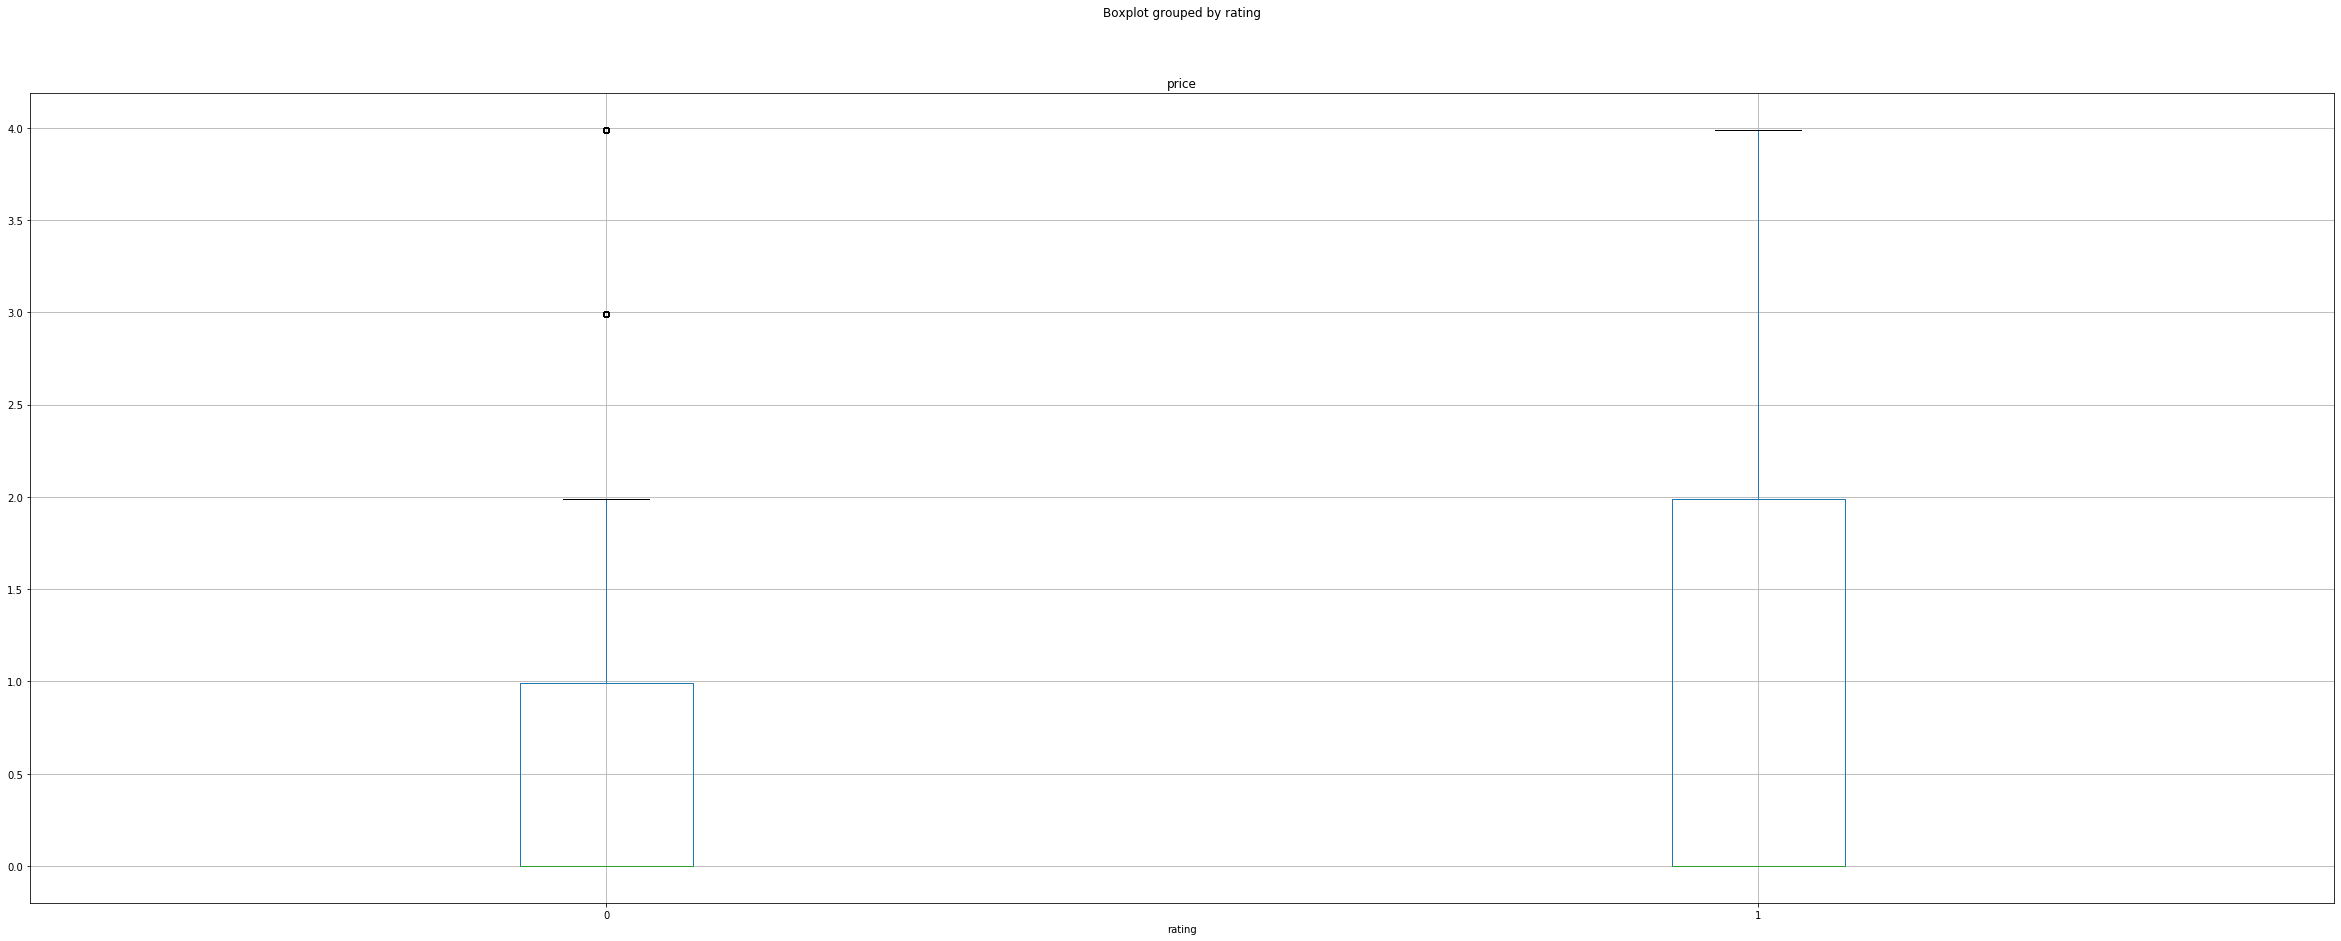

In [37]:
dfPrice.boxplot(column='price', by='rating', figsize = (40,15))

On average, based on price, more of the applications received favorable ratings of above 4 as it can be seen from the table and the plots above. Also, applications with favorable ratings tend to be more expensive in general compared to those with lower ratings. 

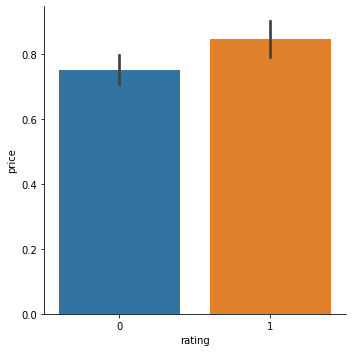

In [38]:
sns.catplot(x='rating', y='price', kind='bar', data=df)

In [39]:
df_lang = df.groupby('lang.num')['rating'].agg(['mean', 'count']).sort_values(by='lang.num')
df_lang = df_lang.reset_index()
df_lang.head(10)

,lang.num,mean,count
0,0,0.166667,30
1,1,0.380474,2489
2,2,0.328889,450
3,3,0.431818,132
4,4,0.478873,71
5,5,0.555556,99
6,6,0.514706,68
7,7,0.585714,70
8,8,0.523256,86
9,9,0.530120,83


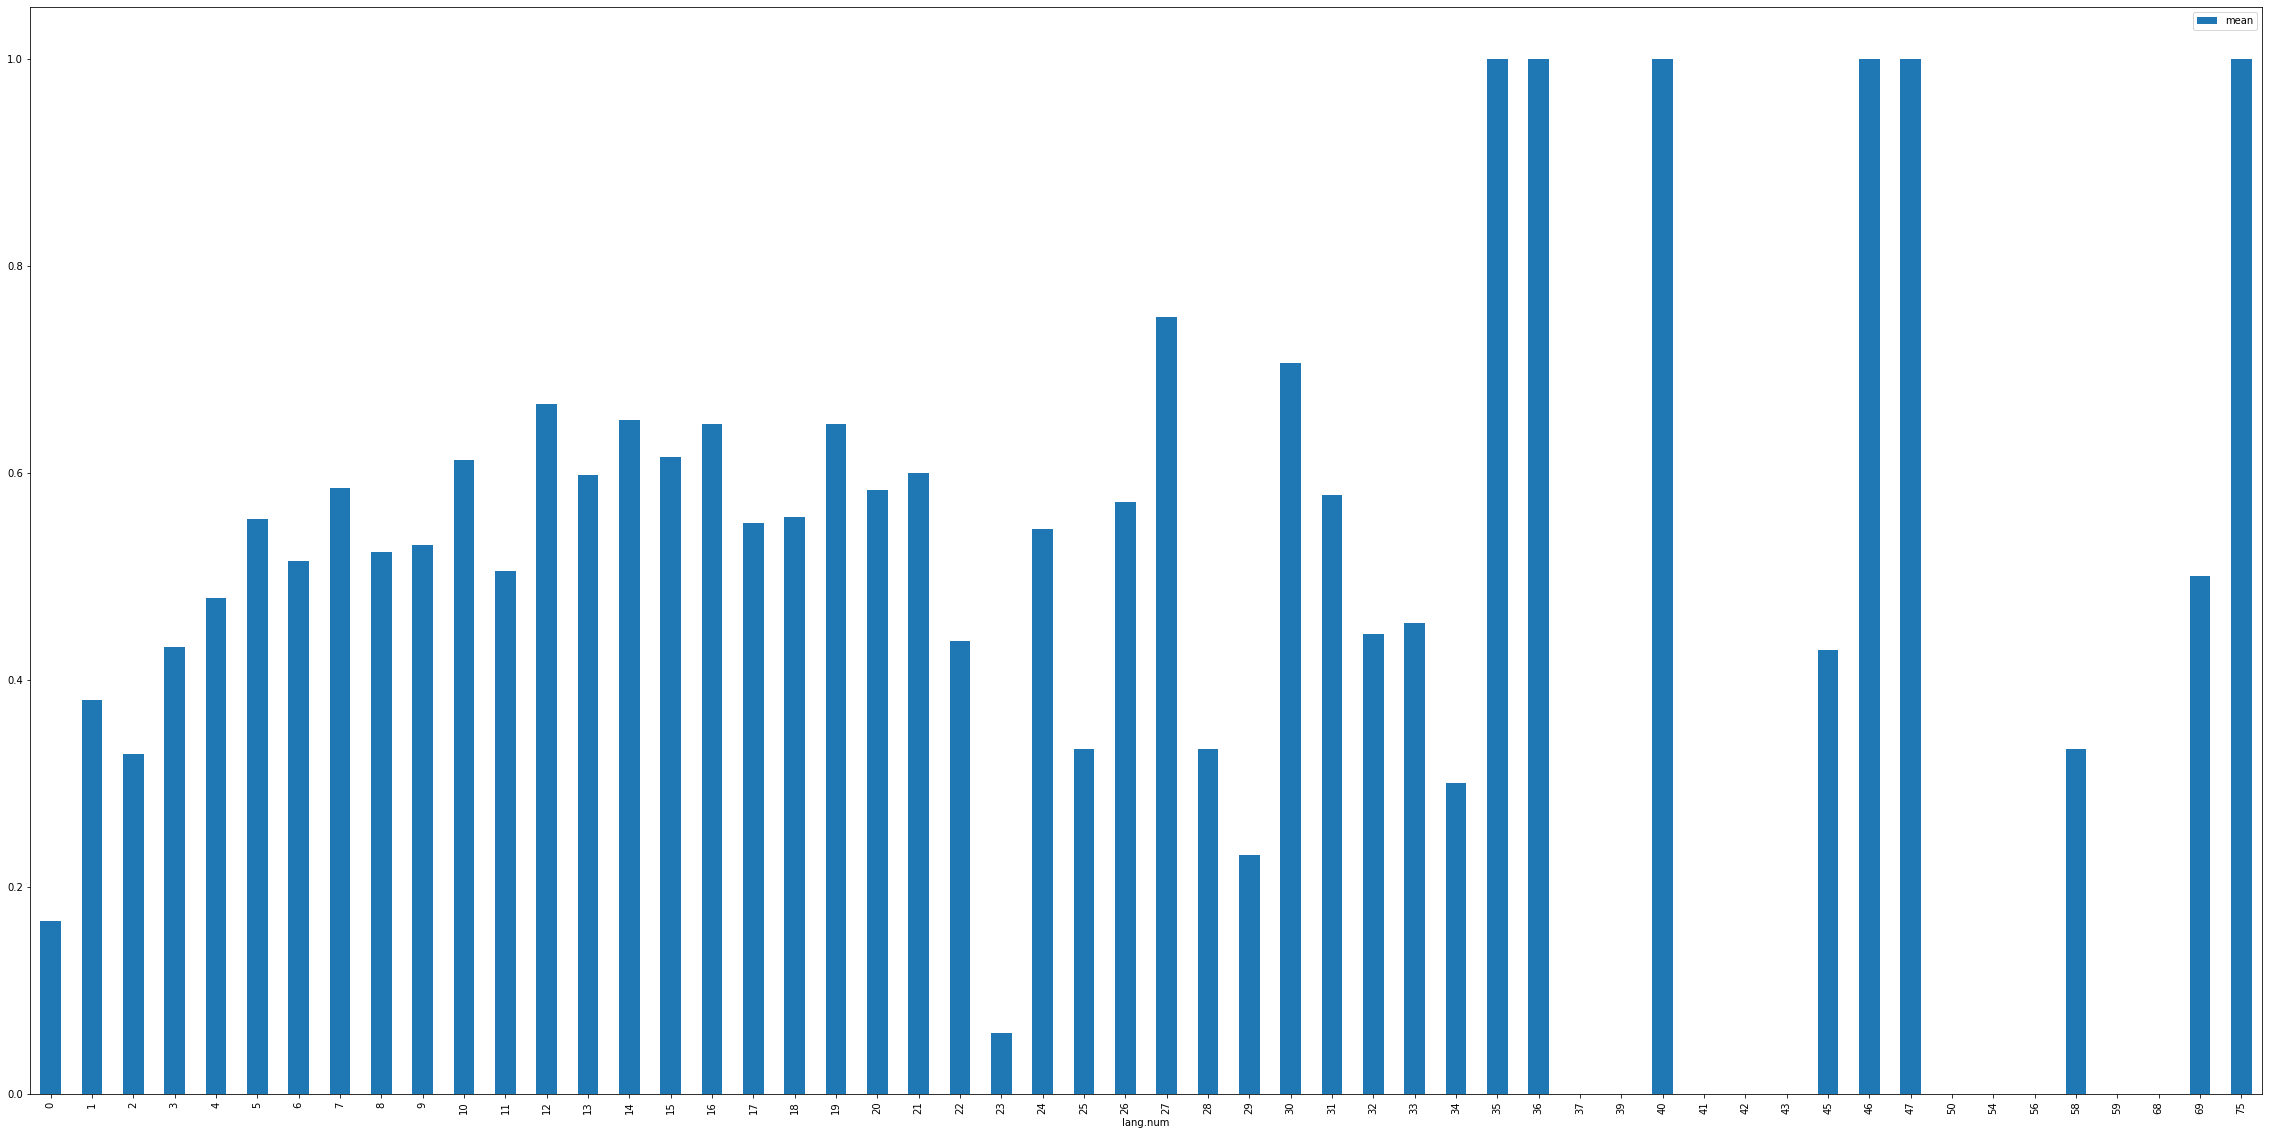

In [40]:

df_lang.plot(kind = 'bar', x = 'lang.num' , y='mean', figsize=(40,20))

Based on the plot above, in general, the distribution of languages supported by applications cannot really be nailed on following a given trend with respect to ratings. Definitely, applications that support atleast 20 languages showed that more than 30% ratings is given to be above 4 stars. Apps that support more languages have dispersed rating trend. 

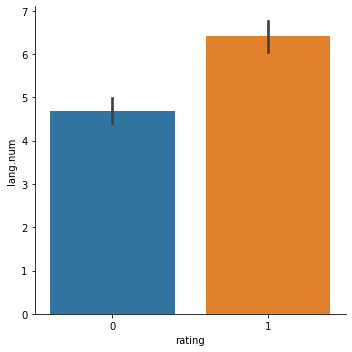

In [41]:
sns.catplot(x='rating', y='lang.num', kind='bar', data=df)

Compared to the bar plot before the plot above, categorical plot of rating and number of languages supported by each application shows that with increasing number of supporting languages per application, more apps can get ratings greater 4

Grouping Rating and Supporting Devices

In [42]:
df_supDevices = df.groupby('sup_devices.num')['rating'].agg(['mean', 'count']).sort_values(by='sup_devices.num')
df_supDevices = df_supDevices.reset_index()
df_supDevices.head(10)

,sup_devices.num,mean,count
0,9,1.000000,1
1,11,1.000000,1
2,12,1.000000,1
3,13,0.000000,2
4,15,1.000000,1
5,16,0.000000,2
6,23,0.000000,1
7,24,0.349515,103
8,25,0.266667,30
9,26,0.047619,21


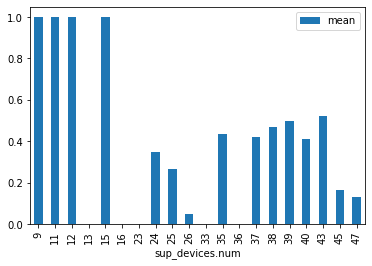

In [43]:
df_supDevices.plot(kind = 'bar', x = 'sup_devices.num' , y='mean')

Going by the plot above, no strong conclusion can be made that supporting devices influence number of ratings given to apps. If the plot is viewed per segment, apps that support devices above 35 definitely have atleast 15% chance to receive ratings of above 4 stars. On the flip side, some apps below 35 supporting devices did nopt receive any rating above 4 stars while others got more 100% ratings of above 4 stars

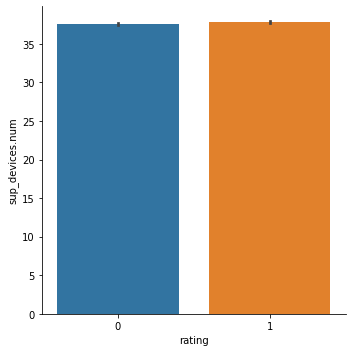

In [44]:
sns.catplot(x='rating', y='sup_devices.num', kind='bar', data=df)

Grouping Rating and Supporting Devices

In [45]:
df_ratingCount = df.groupby('rating')['rating_count_tot'].describe()
df_ratingCount.head(10)

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
0,2618.0,6291.541253,31724.675163,0.0,1.0,93.0,786.75,508808.0
1,1987.0,24362.989935,106827.672384,1.0,194.5,1490.0,9646.00,2161558.0


In [46]:
df.to_csv(r'/Users/oluwafemibabatunde/Desktop/Springboard/capstone_one/apple-app/data/step2_output.csv')

Some variables in the dataset will need to be dropped for the analysis to be carried out as they obviously do not have strong relationship with the dependent variable. 
Kindly let me know what are the other things that need to be done with respect to EDA of the dependent variable.